Simple PLR
==========

This example demonstrates how to use the ``.light_stamper(...)`` and ``.pupil_grabber(...)`` methods to measure and plot a simple PLR relative to the onset of any light source detectable by the Pupil Core World Camera, which in this case was a light switched on and off in a dark room.

> Waiting for a light to stamp...
> Grabbing 10 seconds of pupil.1.3d
Waiting for futures...
Waiting for futures...
> Light stamped on frame.world at 451747.552097
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
Waiting for futures...
> PupilGrabber done grabbing 10 seconds of pupil.1.3d


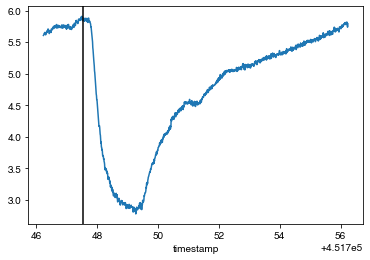

In [1]:
from time import sleep

from pyplr.pupil import PupilCore
from pyplr.utils import unpack_data_pandas

# Connect to Pupil Core
p = PupilCore()

# Start a new recording called "my_recording"
p.command('R my_recording')

# Wait a few seconds
sleep(2)

# Make an annotation for when the light comes on
annotation = p.new_annotation('LIGHT_ON')

# Start the .light_stamper(...) and .pupil_grabber(...)
lst_future = p.light_stamper(annotation=annotation, timeout=10)
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=10)

##################################
# Administer light stimulus here #
##################################

# Wait for the futures
while lst_future.running() or pgr_future.running():
    print('Waiting for futures...')
    sleep(1)

# End recording
p.command('r')

# Get the timestamp and pupil data
timestamp = lst_future.result()[1]
data = unpack_data_pandas(pgr_future.result())

# Plot the PLR
ax = data['diameter_3d'].plot()
ax.axvline(x=timestamp, color='k')